In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
# Simulation parameters
max_qubits = 6  # Maximum number of qubits to simulate
num_trotter_steps = 10  # Number of Trotter steps for the time evolution
time_step = 0.1  # Time step for evolution
J = 1.0  # Interaction strength
h = 1.0  # External field strength

In [3]:
# Arrays to store metrics as a function of qubits
qubit_counts = list(range(2, max_qubits + 1))
gates_per_primitive = []
depth_per_primitive = []
time_per_primitive = []
total_gates_list = []
total_depth_list = []

In [4]:
# Define functions for the Hamiltonian components
def hamiltonian_coupling(n_qubits):
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])
        qml.RZ(-2 * J * time_step, wires=i + 1)
        qml.CNOT(wires=[i, i + 1])

def hamiltonian_field(n_qubits):
    for i in range(n_qubits):
        qml.RX(-2 * h * time_step, wires=i)

In [5]:
# Loop over different qubit counts
for n_qubits in qubit_counts:
    dev = qml.device("default.qubit", wires=n_qubits)
    
    # Metrics to track for each run
    gate_counts = {'state_preparation': 0, 'evolution': 0, 'measurement': 0}
    depth_counts = {'state_preparation': 0, 'evolution': 0, 'measurement': 0}
    time_stats = {'state_preparation': 0, 'evolution': 0, 'measurement': 0}

    # Define the quantum circuit
    @qml.qnode(dev)
    def ising_model_circuit():
        # State Preparation
        start_time = time()
        for i in range(n_qubits):
            qml.Hadamard(wires=i)
            gate_counts['state_preparation'] += 1
        depth_counts['state_preparation'] += 1
        time_stats['state_preparation'] = time() - start_time
        
        # Evolution via Trotter steps
        start_time = time()
        for _ in range(num_trotter_steps):
            hamiltonian_coupling(n_qubits)
            hamiltonian_field(n_qubits)
            gate_counts['evolution'] += 3 * (n_qubits - 1)  # 2 CNOTs and 1 RZ per pair
            gate_counts['evolution'] += n_qubits  # RX gates for each qubit
            depth_counts['evolution'] += 2  # Each Trotter step adds two layers
        time_stats['evolution'] = time() - start_time
        
        # Measurement
        start_time = time()
        measurements = [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]
        gate_counts['measurement'] += n_qubits
        depth_counts['measurement'] += 1
        time_stats['measurement'] = time() - start_time
        
        return measurements

    # Run the simulation
    result = ising_model_circuit()

    # Store metrics for each qubit count
    gates_per_primitive.append(list(gate_counts.values()))
    depth_per_primitive.append(list(depth_counts.values()))
    time_per_primitive.append(list(time_stats.values()))
    total_gates_list.append(sum(gate_counts.values()))
    total_depth_list.append(sum(depth_counts.values()))

In [6]:
# Convert to numpy arrays for easier indexing
gates_per_primitive = np.array(gates_per_primitive)
depth_per_primitive = np.array(depth_per_primitive)
time_per_primitive = np.array(time_per_primitive)

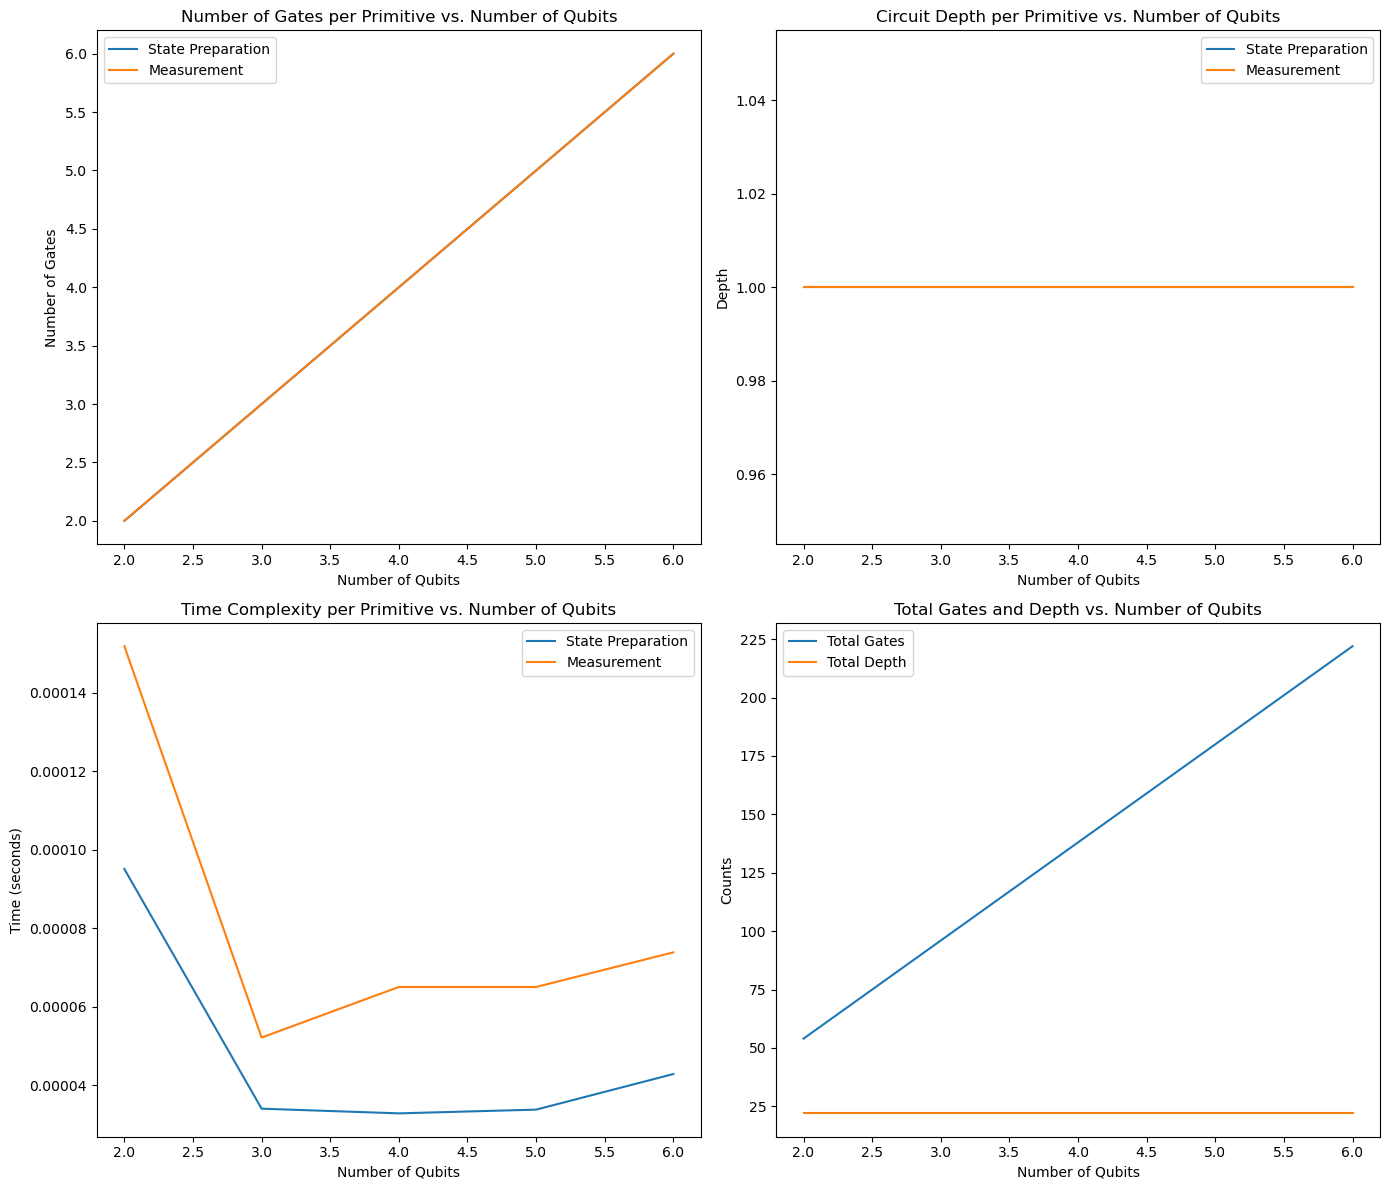

In [8]:
# Plotting the metrics as a function of the number of qubits
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot number of gates per primitive vs qubits
axs[0, 0].plot(qubit_counts, gates_per_primitive[:, 0], label="State Preparation")
#axs[0, 0].plot(qubit_counts, gates_per_primitive[:, 1], label="Evolution")
axs[0, 0].plot(qubit_counts, gates_per_primitive[:, 2], label="Measurement")
axs[0, 0].set_title("Number of Gates per Primitive vs. Number of Qubits")
axs[0, 0].set_xlabel("Number of Qubits")
axs[0, 0].set_ylabel("Number of Gates")
axs[0, 0].legend()

# Plot circuit depth per primitive vs qubits
axs[0, 1].plot(qubit_counts, depth_per_primitive[:, 0], label="State Preparation")
#axs[0, 1].plot(qubit_counts, depth_per_primitive[:, 1], label="Evolution")
axs[0, 1].plot(qubit_counts, depth_per_primitive[:, 2], label="Measurement")
axs[0, 1].set_title("Circuit Depth per Primitive vs. Number of Qubits")
axs[0, 1].set_xlabel("Number of Qubits")
axs[0, 1].set_ylabel("Depth")
axs[0, 1].legend()

# Plot time complexity per primitive vs qubits
axs[1, 0].plot(qubit_counts, time_per_primitive[:, 0], label="State Preparation")
#axs[1, 0].plot(qubit_counts, time_per_primitive[:, 1], label="Evolution")
axs[1, 0].plot(qubit_counts, time_per_primitive[:, 2], label="Measurement")
axs[1, 0].set_title("Time Complexity per Primitive vs. Number of Qubits")
axs[1, 0].set_xlabel("Number of Qubits")
axs[1, 0].set_ylabel("Time (seconds)")
axs[1, 0].legend()

# Plot total gates vs. total depth as functions of qubit count
axs[1, 1].plot(qubit_counts, total_gates_list, label="Total Gates")
axs[1, 1].plot(qubit_counts, total_depth_list, label="Total Depth")
axs[1, 1].set_title("Total Gates and Depth vs. Number of Qubits")
axs[1, 1].set_xlabel("Number of Qubits")
axs[1, 1].set_ylabel("Counts")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

Spins: 2, Gate Count: 52, Circuit Depth: 41
Spins: 3, Gate Count: 93, Circuit Depth: 71
Spins: 4, Gate Count: 134, Circuit Depth: 74
Spins: 5, Gate Count: 175, Circuit Depth: 77
Spins: 6, Gate Count: 216, Circuit Depth: 80
Spins: 7, Gate Count: 257, Circuit Depth: 83
Spins: 8, Gate Count: 298, Circuit Depth: 86
Spins: 9, Gate Count: 339, Circuit Depth: 89
Spins: 10, Gate Count: 380, Circuit Depth: 92
Spins: 11, Gate Count: 421, Circuit Depth: 95
Spins: 12, Gate Count: 462, Circuit Depth: 98
Spins: 13, Gate Count: 503, Circuit Depth: 101
Spins: 14, Gate Count: 544, Circuit Depth: 104


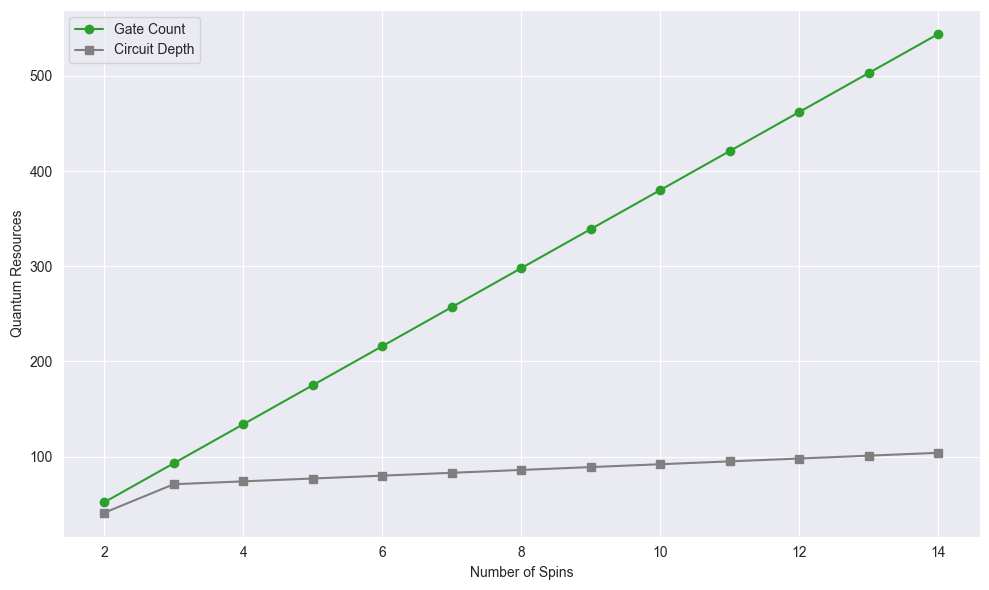

In [4]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set_style("darkgrid")
sns.set_palette("Greens")

# Parameters for the Ising model and Trotterization
J = 1.0  # Interaction strength
h = 1.0  # Magnetic field strength
t_total = 1.0  # Total evolution time
trotter_steps = 10  # Number of Trotter steps
dt = t_total / trotter_steps  # Time step per Trotter iteration

# Range of spins to simulate
spin_range = range(2, 15)  # From 2 up to 14 spins
gate_counts = []
circuit_depths = []

# Function to build a Trotterized quantum circuit for time evolution
def ising_time_evolution(n_spins, trotter_steps):
    dev = qml.device("default.qubit", wires=n_spins)
    
    # Define the Ising Hamiltonian terms as separate functions
    def zz_interaction():
        for i in range(n_spins - 1):
            qml.CNOT(wires=[i, i + 1])
            qml.RZ(-2 * J * dt, wires=i + 1)
            qml.CNOT(wires=[i, i + 1])
    
    def x_interaction():
        for i in range(n_spins):
            qml.RX(-2 * h * dt, wires=i)
    
    # Define the Trotterized quantum circuit
    @qml.qnode(dev)
    def circuit():
        # Apply initial Hadamard gates to put each qubit into the superposition state
        for i in range(n_spins):
            qml.Hadamard(wires=i)
        
        # Apply Trotterized evolution
        for _ in range(trotter_steps):
            zz_interaction()
            x_interaction()
        
        return qml.state()  # Return the final state for reference
    
    # Execute the circuit once to measure gate count and depth
    circuit()
    gate_count = len(circuit.qtape.operations)
    circuit_depth = circuit.qtape.graph.get_depth()
    
    return gate_count, circuit_depth

# Collect gate count and circuit depth data for each number of spins
for n_spins in spin_range:
    gate_count, circuit_depth = ising_time_evolution(n_spins, trotter_steps)
    gate_counts.append(gate_count)
    circuit_depths.append(circuit_depth)
    print(f"Spins: {n_spins}, Gate Count: {gate_count}, Circuit Depth: {circuit_depth}")

# Plotting the gate count and circuit depth as functions of the number of spins
plt.figure(figsize=(10, 6))

# Plot gate count
plt.plot(spin_range, gate_counts, label="Gate Count", marker='o', color ="#2ca02c" )

# Plot circuit depth
plt.plot(spin_range, circuit_depths, label="Circuit Depth", marker='s', color="#7f7f7f"  )

# Labels and title
plt.xlabel("Number of Spins")
plt.ylabel("Quantum Resources")
#plt.title("Gate Count and Circuit Depth for Trotterized Time Evolution of Ising Model")
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
gate_counts

[52, 93, 134, 175, 216, 257, 298, 339, 380, 421, 462, 503, 544]

Classical Expectation Value: -3.0
Classical Runtime: 0.0002 seconds


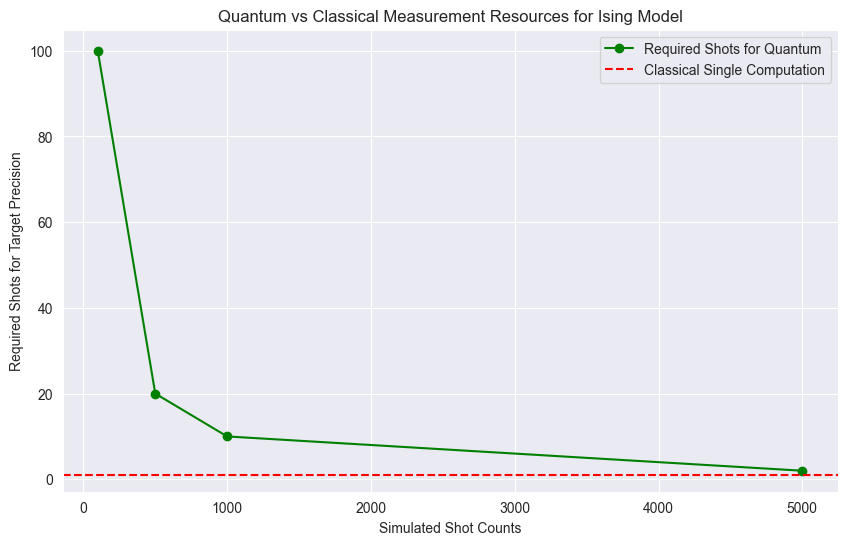

In [11]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
from scipy.sparse import csr_matrix, kron, identity

# Parameters for the Ising model
J = 1.0  # Interaction strength
h = 1.0  # Transverse magnetic field strength
n_spins = 4  # Number of spins
target_precision = 0.01  # Desired precision in expectation value

# Define Pauli matrices for sparse construction
I = csr_matrix([[1, 0], [0, 1]], dtype=np.complex128)
X = csr_matrix([[0, 1], [1, 0]], dtype=np.complex128)
Z = csr_matrix([[1, 0], [0, -1]], dtype=np.complex128)

# Construct the sparse Ising Hamiltonian in matrix form
def ising_hamiltonian_sparse(n_spins, J, h):
    H = csr_matrix((2**n_spins, 2**n_spins), dtype=np.complex128)
    
    # ZZ interaction term
    for i in range(n_spins - 1):
        term = 1
        for j in range(n_spins):
            if j == i:
                term = kron(term, Z)
            elif j == i + 1:
                term = kron(term, Z)
            else:
                term = kron(term, I)
        H += -J * term

    # X field term
    for i in range(n_spins):
        term = 1
        for j in range(n_spins):
            if j == i:
                term = kron(term, X)
            else:
                term = kron(term, I)
        H += -h * term

    return H

# Quantum resource simulation: measuring with finite shots
hamiltonian = ising_hamiltonian_sparse(n_spins, J, h)

# Define the QNode for expectation value measurement with shots as a parameter
def measure_expectation_quantum(shots):
    # Create a new device with specified shots each time
    dev = qml.device("default.qubit", wires=n_spins, shots=shots)
    
    @qml.qnode(dev)
    def circuit():
        # Prepare the initial state |0...0>
        for i in range(n_spins):
            qml.Hadamard(wires=i)
        return qml.expval(qml.Hermitian(hamiltonian.toarray(), wires=range(n_spins)))
    
    # Execute the QNode circuit
    return circuit()

# Function to calculate the number of shots required to reach target precision
def calculate_required_shots(target_precision, measured_value, std_dev):
    return (std_dev / target_precision) ** 2

# Perform quantum measurement simulation with different shot counts
quantum_expectations = []
quantum_shots = []
shot_counts = [100, 500, 1000, 5000]  # Different numbers of shots to test precision

for shots in shot_counts:
    measured_value = measure_expectation_quantum(shots)
    std_dev = np.sqrt(1 / shots)  # Estimate std deviation with sqrt(1/shots)
    required_shots = calculate_required_shots(target_precision, measured_value, std_dev)
    quantum_expectations.append(measured_value)
    quantum_shots.append(required_shots)

# Classical resource calculation: Direct matrix computation for expectation value
def measure_expectation_classical(n_spins, hamiltonian):
    # Initial state |0...0> in vector form
    psi = np.zeros((2**n_spins, 1), dtype=np.complex128)
    psi[0] = 1.0  # Initialize in |0...0> state
    
    # Calculate the expectation value
    expectation_value = (psi.conj().T @ hamiltonian @ psi).real
    return expectation_value[0, 0]  # Extract scalar value from 2D result

# Classical computation for exact value
start_time_classical = time.time()
classical_expectation = measure_expectation_classical(n_spins, hamiltonian)
classical_runtime = time.time() - start_time_classical

print(f"Classical Expectation Value: {classical_expectation}")
print(f"Classical Runtime: {classical_runtime:.4f} seconds")

# Plotting the comparison of required shots
plt.figure(figsize=(10, 6))
plt.plot(shot_counts, quantum_shots, marker='o', color='green', label="Required Shots for Quantum")
plt.axhline(y=1, color='red', linestyle='--', label="Classical Single Computation")
plt.xlabel("Simulated Shot Counts")
plt.ylabel("Required Shots for Target Precision")
plt.title("Quantum vs Classical Measurement Resources for Ising Model")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
quantum_shots

[100.0, 20.000000000000004, 9.999999999999998, 2.0000000000000004]